In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw

import warnings
warnings.filterwarnings("ignore")

sns.set()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
output = pd.read_csv('Smiles-LSTM_ChEMBL28_both.csv', index_col=0)
output['ROMol'] = output.SMILES.map(Chem.MolFromSmiles)
output

,SMILES,HBA,HBD,MW,rotatable,TPSA,cLogP,fsp3,stereo,set,ROMol
0,Br,0,0,80.912,0,0.00,0.5779,0.000000,0,prior,<rdkit.Chem.rdchem.Mol object at 0x7f235008acb0>
1,CCN(CCCCNC(=O)c1cc(-c2ccc(O)cc2)nc2ccccc12)c1c...,4,2,474.004,9,65.46,6.2973,0.214286,0,prior,<rdkit.Chem.rdchem.Mol object at 0x7f230e5a0c10>
2,OC(Cc1ccccc1)NCc1ccc(-c2cc(Oc3ccccc3)ccn2)cc1,4,2,396.490,8,54.38,5.1916,0.115385,1,prior,<rdkit.Chem.rdchem.Mol object at 0x7f230e4f39e0>
4,CC(=O)NC(C)Cc1ccccc1,1,1,177.247,3,29.10,1.7537,0.363636,1,prior,<rdkit.Chem.rdchem.Mol object at 0x7f230e4f3ad0>
5,CCCCCCCCCN(CCCCCCC)C(=O)c1ccc(Oc2ccc(Cl)cn2)c(...,4,1,488.116,17,68.45,8.2727,0.571429,0,prior,<rdkit.Chem.rdchem.Mol object at 0x7f230e4f3940>
...,...,...,...,...,...,...,...,...,...,...,...
1915,O=C(CCCc1ccccc1)Nc1nc2cc(F)ccc2c2nc(-c3ccco3)nn12,6,1,415.428,6,85.32,4.6380,0.130435,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7f230e4a7170>
1916,CN(CCCc1ccccc1)C(=O)COc1ccc(NC(=O)CC(C)C)cc1,3,1,382.504,10,58.64,4.1412,0.391304,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7f230e4a71c0>
1917,O=c1c2ncn3nc(-c4ccccc4)cc3c2c(-c2ccco2)nn1CC1CC1,7,0,383.411,4,78.22,3.7762,0.181818,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7f230e4a7210>
1918,Nc1nc2c(cnn2CCN2CCc3ccc(Br)cc3C2)c2nc(-c3ccco3...,9,1,479.342,4,103.30,3.1370,0.238095,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7f230e4a7260>


# Loss

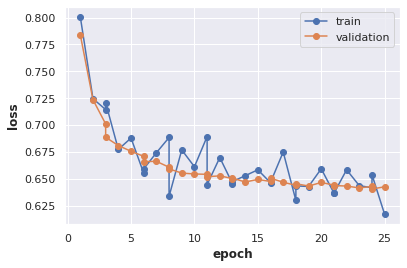

In [47]:
train_info = pd.read_csv('Smiles-LSTM_ChEMBL28_prior_info.csv')

plt.plot(train_info.epoch, train_info.train_loss, '-o',label='train')
plt.plot(train_info.epoch, train_info.val_loss, '-o', label='validation')

plt.xlabel('epoch', weight='bold')
plt.ylabel('loss', weight='bold')

plt.legend()
plt.show()

# PhysChem properties

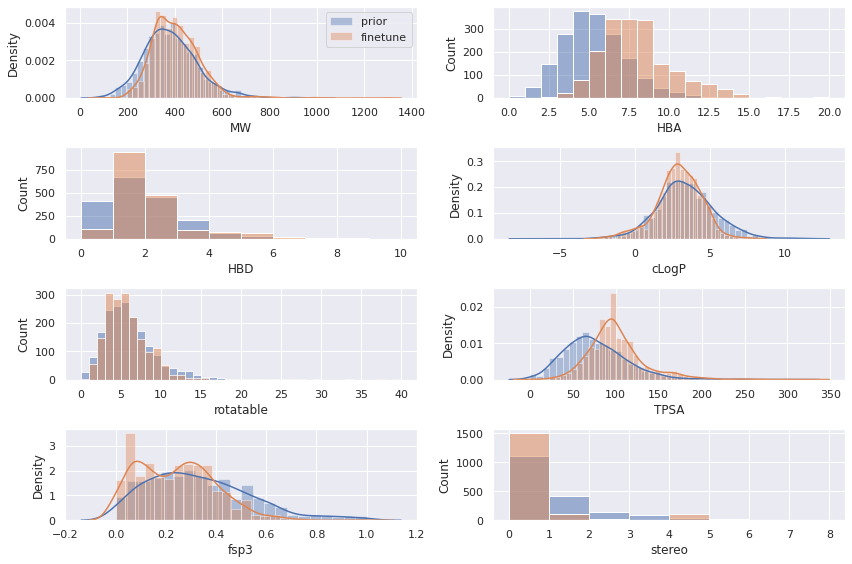

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(12,8))
axes = axes.flatten()

mask = output.set == 'prior'

for i, col in enumerate(['MW','HBA','HBD','cLogP','rotatable','TPSA','fsp3','stereo']):
    series_prior = output[col][mask]
    series_finetune = output[col][~mask]
    
    if series_prior.dtype == int:
        sns.histplot(series_prior, ax=axes[i], binwidth=1, label='prior', color=colors[0], alpha=0.5)
    else:
        sns.distplot(series_prior, ax=axes[i], label='prior')
    
    if series_finetune.dtype == int:
        sns.histplot(series_finetune, ax=axes[i], binwidth=1, label='finetune', color=colors[1], alpha=0.5)
    else:
        sns.distplot(series_finetune, ax=axes[i], label='finetune')
        
        
axes[0].legend()

plt.tight_layout()
plt.show()

# Prior sample

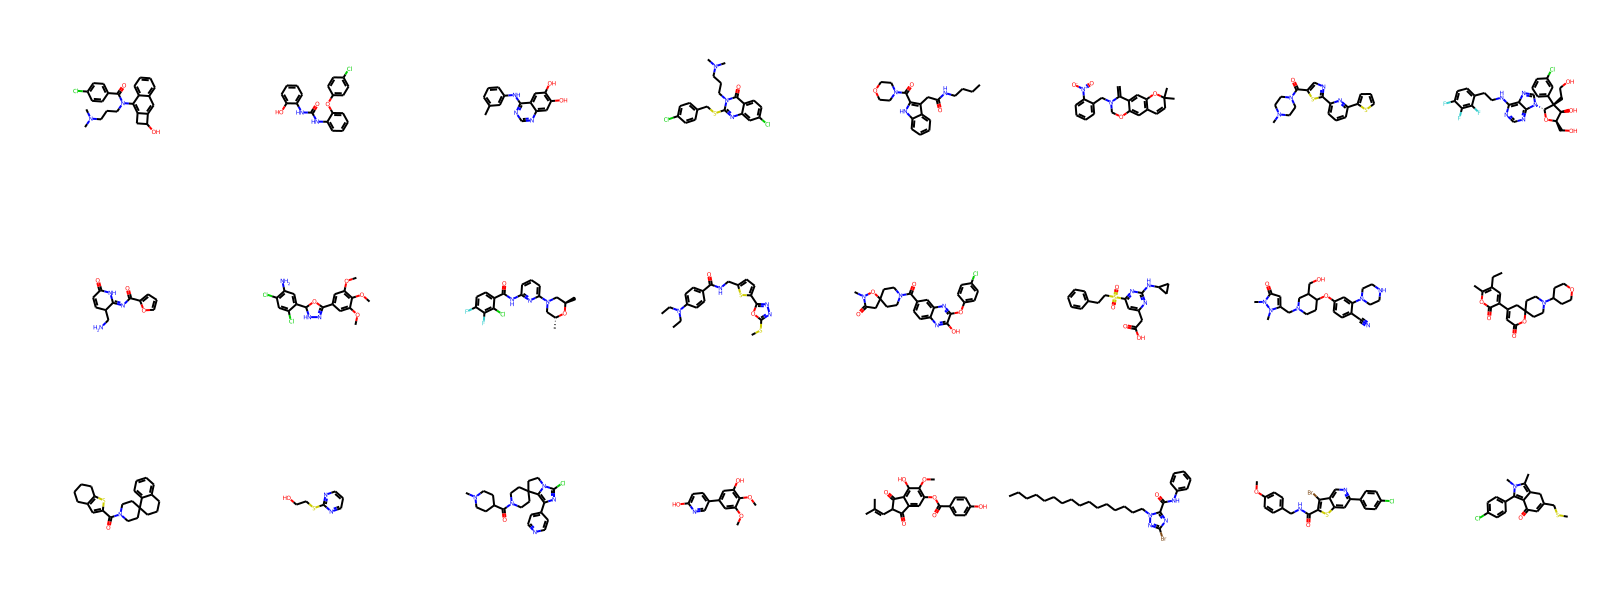

In [48]:
mask = output.set == 'prior'

Draw.MolsToGridImage(output.ROMol[mask].sample(24), molsPerRow=8)

# Finetuning sample

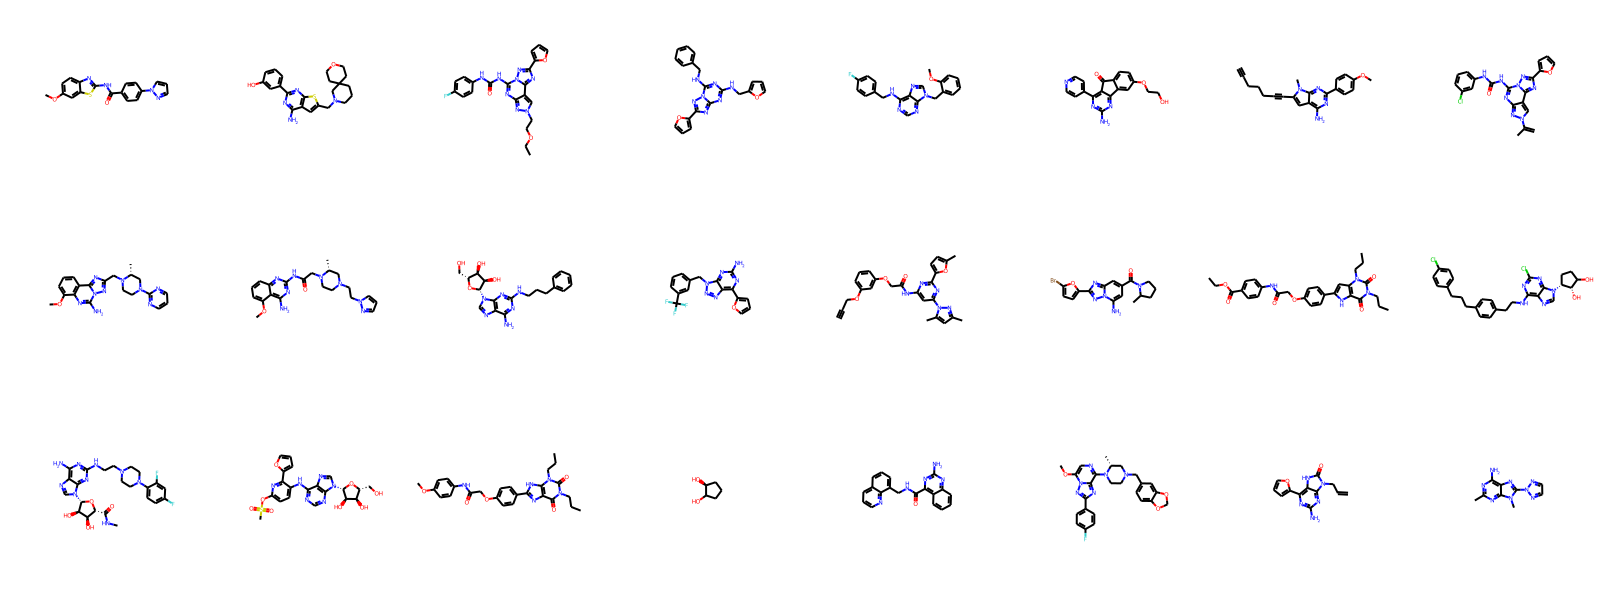

In [49]:
mask = output.set == 'prior'

Draw.MolsToGridImage(output.ROMol[~mask].sample(24), molsPerRow=8)